<a href="https://colab.research.google.com/github/RomanZavar/library_ds/blob/main/H_W_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание 1
* Импортируйте библиотеки pandas, numpy и matplotlib.
* Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42. Масштабируйте данные с помощью StandardScaler. Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42. Постройте диаграмму рассеяния на этих данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')
import requests
url = "http://lib.stat.cmu.edu/datasets/boston"
text = requests.get(url).text.split('\n')
feature_names = [line.split()[0] for line in text[7:21]]
DESCR = "\n".join(text[:21])
lines1 = [line.split() for line in text[22::2]]
lines2 = [line.split() for line in text[23::2]]
table = [a + b for a, b in zip(lines1, lines2)]
data = pd.DataFrame()
for line in table:
    line = [i.strip() for i in line]
    data = data._append(pd.Series(line, index=feature_names), ignore_index=True)

data = data.astype(float)
target = data['MEDV'].to_numpy()
data.drop('MEDV', axis=1, inplace=True)
feature_names = feature_names[:-1]
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne.shape

(404, 2)

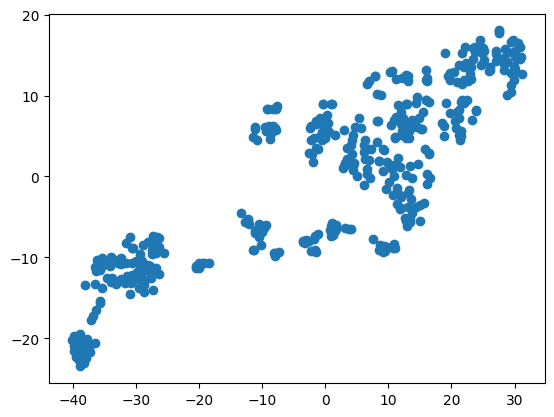

In [6]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

##Задание 2

* С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
* Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.Вычислите средние значения price и CRIM в разных кластерах.

In [7]:
from  sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
labels_train = kmeans.fit_predict(X_train_scaled)

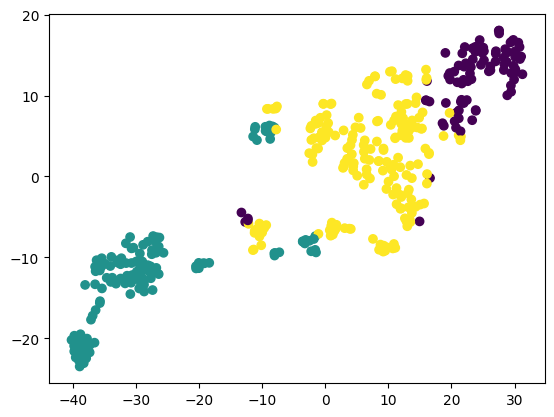

In [8]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [20]:
y_train[labels_train == 0].mean()

27.78837209302326

In [21]:
X_train_scaled[labels_train == 0][0].mean()

2.553170503768035

In [22]:
y_train[labels_train == 1].mean()

16.1796875

In [23]:
X_train_scaled[labels_train == 1][0].mean()

3.439448504191554

In [24]:
y_train[labels_train == 2].mean()

24.99473684210526

In [25]:
X_train_scaled[labels_train == 2][0].mean()

2.7281352733916853

## * Задание 3
* Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [10]:
labels_test = kmeans.predict(X_test_scaled)

In [11]:
y_test[labels_test == 0].mean()

31.35

In [15]:
X_test_scaled[labels_test == 0][0].mean()

2.9010536496646293

In [16]:
y_test[labels_test == 1].mean()

16.43714285714286

In [17]:
X_test_scaled[labels_test == 1][0].mean()

3.281999400623945

In [18]:
y_test[labels_test == 2].mean()

21.860784313725492

In [19]:
X_test_scaled[labels_test == 2][0].mean()

2.5895407371325914